# 📱 Google Play Store Apps Data Analysis (EDA)

## Dataset Overview
This dataset contains information about applications available on the Google Play Store,
including app category, ratings, reviews, size, installs, type, and pricing details.

## Objective
The objective of this analysis is to:
- Understand app performance based on ratings and installs
- Analyze category-wise trends
- Identify factors influencing app popularity
-----------------------------------------------------------------------------------------------------------------

### Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt 
import seaborn as sns 

In [2]:
import matplotlib.style as style
style.use('ggplot')
plt.style.use('seaborn-v0_8')

### Load Playstore Dataset 

In [3]:
df=pd.read_csv('googleplaystore.csv')

###  Datset Preview 

In [4]:
# Display top 5 Rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Display last 5 Rows 
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Dataset shape (Rows and Columns)

In [6]:
print("Number of Rows    ::",df.shape[0])
print("Number of Columns ::",df.shape[1])

Number of Rows    :: 10841
Number of Columns :: 13


This shows the total number of records (rows) and features (columns) in the dataset, helping assess the dataset size and analysis scope.

### Display Information about Datset .

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Provides details about column names, data types, and non-null counts to verify data structure and data quality before analysis.

### Get overall statistics about the dataset.

In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Provides summary statistics such as count, mean, standard deviation, and value ranges, offering a quick overview of the dataset’s numerical features.

### Number of apps titles contain ("Astrology")

In [9]:
df['App'].str.contains('Astrology',case=False).sum()

3

Counts how many applications have “Astrology” in their title, helping assess the presence of astrology-related apps on the Play Store.

###  Average app rating

In [10]:
df['Rating'].mean()

4.193338315362443

Represents the overall average rating of apps, providing a general measure of app quality on the Play Store.

### Number of Unique App Categories

In [11]:
df['Category'].nunique()

34

Shows how many distinct app categories are present in the dataset, indicating the diversity of apps available on the Play Store.

### Category getting the highest average rating 

In [12]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan

In [13]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
EVENTS                 4.435556
EDUCATION              4.389032
ART_AND_DESIGN         4.358065
BOOKS_AND_REFERENCE    4.346067
PERSONALIZATION        4.335987
Name: Rating, dtype: float64

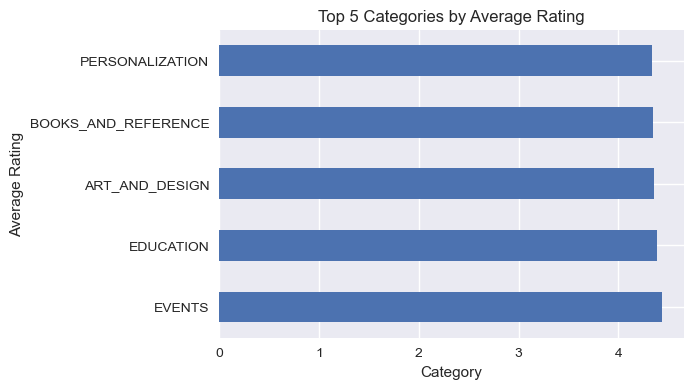

In [14]:
top_cat = (
    df.groupby('Category')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
top_cat.plot(kind='barh', figsize=(6,4))
plt.title("Top 5 Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

Identifies the app category with the highest average user rating, indicating stronger user satisfaction in that category.

### Find average value of reviews

In [15]:
(df['Rating']==5).sum()

274

Counts the number of applications that have received a perfect 5-star rating, indicating top-rated apps on the Play Store.

### Average Number of reviews

In [16]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [17]:
df['Reviews'].mean()

444152.89603321033

Represents the typical number of reviews received by apps, indicating overall user engagement on the Play Store.

In [18]:
### Find total number of free and paid apps

In [24]:
df['Type']=df['Type'].replace('0','Free')

In [25]:
df['Type'].value_counts()

Type
Free    10040
Paid      800
Name: count, dtype: int64

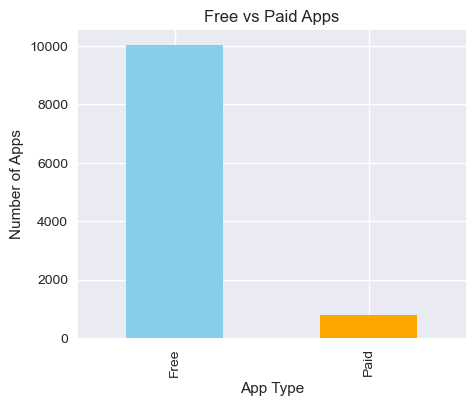

In [27]:
df['Type'].value_counts().plot(kind='bar', figsize=(5,4), color=['skyblue', 'orange'])
plt.title("Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Number of Apps")
plt.show()

Shows the distribution of free and paid applications on the Play Store, highlighting the dominance of free apps.

### App with Maximum Reviews

In [38]:
df.loc[df['Reviews'].idxmax(), ['App', 'Reviews']]

App          Facebook
Reviews    78158306.0
Name: 2544, dtype: object

Identifies the application with the highest number of reviews, indicating the most user-engaged app on the Play Store.

### Display top 5 apps having highest reviews

In [47]:
top_reviews = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(5)
top_reviews

,App,Reviews
2544,Facebook,78158306.0
3943,Facebook,78128208.0
381,WhatsApp Messenger,69119316.0
336,WhatsApp Messenger,69119316.0
3904,WhatsApp Messenger,69109672.0


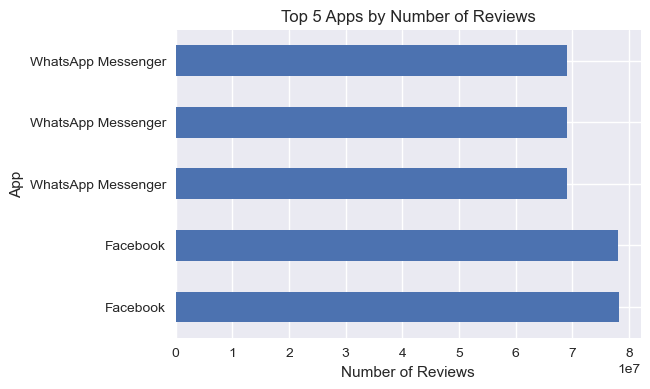

In [48]:
top_reviews.set_index('App')['Reviews'].plot(kind='barh', figsize=(6,4))
plt.title("Top 5 Apps by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("App")
plt.show()

Shows the applications with the highest number of user reviews, indicating the most popular and actively used apps.

### Average rating of free and paid apps

In [49]:
df.groupby('Type')['Rating'].mean()

Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64

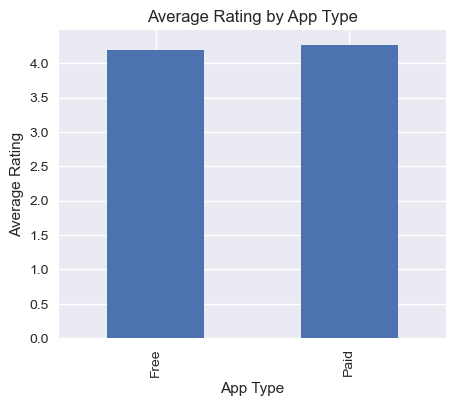

In [52]:
df.groupby('Type')['Rating'].mean().plot(kind='bar', figsize=(5,4))
plt.title("Average Rating by App Type")
plt.xlabel("App Type")
plt.ylabel("Average Rating")
plt.show()

Compares the average ratings of free and paid apps, helping understand whether pricing type influences user satisfaction.

### Display top 5 apps having maximum installs

In [56]:
top_installs = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)
top_installs

,App,Installs
10472,Life Made WI-Fi Touchscreen Photo Frame,Free
420,UC Browser - Fast Download Private & Secure,"500,000,000+"
474,LINE: Free Calls & Messages,"500,000,000+"
3767,Flipboard: News For Our Time,"500,000,000+"
3574,Cloud Print,"500,000,000+"


In [ ]:
df['Installs']=pd.to_numeric(df[''])

In [58]:
top_installs.set_index('App')['Installs'].plot(kind='barh', figsize=(6,4))
plt.title("Top 5 Apps by Installs")
plt.xlabel("Number of Installs")
plt.ylabel("App")
plt.show()

TypeError: no numeric data to plot